<a href="https://colab.research.google.com/github/mdclary/PyCaret/blob/main/DEEP_LEARNING_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing libraries
from __future__ import print_function, division

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#assigning my training dataset
data = pd.read_csv('/content/gdrive/MyDrive/Deep Learning Final/NFL_DEFENSE_STATS_2014_2019_DATASET.csv')

In [ ]:
#assigning my unseen dataset for the prediction
prediction_data = pd.read_csv('/content/gdrive/MyDrive/Deep Learning Final/NFL_DEFENSE_STATS_2020_DATASET.csv')

In [ ]:
#viewing first few rows on my dataset
data.head()

,TEAM,SEASON,SEASON_GAMES_PLAYED,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
0,ARIZONA CARDINALS,2014,16,11,5,0,1,0,0,18.7,368.2,63.1,5.8,1.56,0.44,18.8,22.8,36.2,259.5,1.38,1.13,6.8,12.2,24.8,108.7,0.56,4.4,4.81,8.13,74.5,29.8,12.8
1,ATLANTA FALCONS,2014,16,6,10,0,0,0,0,26.1,398.3,64.9,6.1,1.75,0.75,22.4,22.4,35.4,279.9,1.25,1.00,7.6,14.0,28.1,118.4,1.31,4.2,6.75,5.69,46.5,42.6,14.2
2,BALTIMORE RAVENS,2014,16,10,6,0,1,0,0,18.9,336.9,64.6,5.2,1.38,0.69,19.4,23.9,37.2,248.7,1.38,0.69,6.2,12.8,24.4,88.3,0.50,3.6,4.69,6.88,62.9,33.3,11.7
3,BUFFALO BILLS,2014,16,9,7,0,0,0,0,18.1,312.2,64.2,4.9,1.88,0.69,18.9,21.1,34.9,205.8,1.00,1.19,5.4,10.7,25.9,106.4,0.63,4.1,5.56,6.50,53.1,28.3,14.1
4,CAROLINA PANTHERS,2014,16,7,8,1,1,1,0,23.4,339.8,62.4,5.4,1.63,0.75,19.3,22.8,35.1,227.8,1.56,0.88,6.1,12.1,24.8,112.0,0.88,4.5,5.69,6.06,47.5,34.1,14.0


In [ ]:
#reviewing all columns
data.columns

Index(['TEAM', 'SEASON', 'SEASON_GAMES_PLAYED', 'SEASON_GAMES_WON',
       'GAMES_LOST', 'GAMES_TIED', 'SEASON_PLAYOFF_APPEARANCE',
       'DIVISION_CHAMPION_INDICATOR', 'SEASON_SUPERBOWL_CHAMP_INDICATOR',
       'AVG_POINTS_SCORED_PER_GAME___ALL', 'AVG_YARDS_PER_GAME_ALLOWED_BY_DE',
       'AVERAGE_Offensive_Plays_PER_GAME', 'AVG_YARDS_PER_OFFENSIVE_PLAY_PER',
       'AVG_TAKEAWAYS_PER_GAME_ALLOWED_B', 'AVG_FUMBLES_LOST_BY_TEAM_PER_GAM',
       'AVG_FIRST_DOWNS_PER_GAME_ALLOWED', 'AVG_PASSES_COMPLETED_PER_GAME_AL',
       'AVG_RUSHING_ATTEMPTS_PER_GAME_AL', 'AVG_RUSHING_YARDS_GAINED_PER_GAM',
       'AVG_RUSHING_TOUCHDOWNS_PER_GAME', 'AVG_INTERCEPTION_PER_GAME_CAUSED',
       'AVG_NET_YARDS_GAINED_PER_GAME_AL', 'AVG_FIRST_DOWNS_BY_PASSING_PER_G',
       'AVG_RUSHING_YARDS_ATTEMPTS_PER_G', 'AVG_RUSHING_YARDS_GAINED_PE_0001',
       'AVG_RUSHING_TDS_PER_GAME_ALLOWED', 'AVG_RUSHING_YARDS_ATTEMPTED_PER',
       'AVG_FIRST_DOWNS_BY_PASSING_0001', 'AVG_DEFENSIVE_PENALTIES_BY_GAME',
       '

In [ ]:
#reviewing datatypes
data.dtypes

TEAM                                 object
SEASON                                int64
SEASON_GAMES_PLAYED                   int64
SEASON_GAMES_WON                      int64
GAMES_LOST                            int64
GAMES_TIED                            int64
SEASON_PLAYOFF_APPEARANCE             int64
DIVISION_CHAMPION_INDICATOR           int64
SEASON_SUPERBOWL_CHAMP_INDICATOR      int64
AVG_POINTS_SCORED_PER_GAME___ALL    float64
AVG_YARDS_PER_GAME_ALLOWED_BY_DE    float64
AVERAGE_Offensive_Plays_PER_GAME    float64
AVG_YARDS_PER_OFFENSIVE_PLAY_PER    float64
AVG_TAKEAWAYS_PER_GAME_ALLOWED_B    float64
AVG_FUMBLES_LOST_BY_TEAM_PER_GAM    float64
AVG_FIRST_DOWNS_PER_GAME_ALLOWED    float64
AVG_PASSES_COMPLETED_PER_GAME_AL    float64
AVG_RUSHING_ATTEMPTS_PER_GAME_AL    float64
AVG_RUSHING_YARDS_GAINED_PER_GAM    float64
AVG_RUSHING_TOUCHDOWNS_PER_GAME     float64
AVG_INTERCEPTION_PER_GAME_CAUSED    float64
AVG_NET_YARDS_GAINED_PER_GAME_AL    float64
AVG_FIRST_DOWNS_BY_PASSING_PER_G

In [ ]:
#relationship between features and playoff appearances 
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,SEASON,SEASON_GAMES_PLAYED,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
SEASON,1.00,nan,-0.00,-0.00,0.05,-0.03,-0.03,0.00,0.02,-0.03,-0.14,0.04,-0.10,-0.07,0.03,-0.01,-0.11,-0.09,-0.02,-0.09,-0.05,-0.07,-0.06,0.07,0.18,0.19,0.13,-0.00,0.03,0.13,-0.02
SEASON_GAMES_PLAYED,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
SEASON_GAMES_WON,-0.00,nan,1.00,-1.00,-0.07,0.62,0.58,0.11,-0.52,-0.27,-0.19,-0.22,0.45,0.28,-0.20,0.14,0.35,-0.07,-0.27,0.40,-0.36,-0.00,-0.56,-0.38,-0.29,-0.04,-0.33,-0.03,-0.02,-0.43,0.51
GAMES_LOST,-0.00,nan,-1.00,1.00,-0.01,-0.61,-0.57,-0.11,0.52,0.27,0.18,0.22,-0.44,-0.28,0.19,-0.15,-0.36,0.07,0.27,-0.39,0.36,-0.00,0.56,0.38,0.28,0.04,0.32,0.03,0.02,0.43,-0.51
GAMES_TIED,0.05,nan,-0.07,-0.01,1.00,-0.06,-0.05,-0.05,0.03,0.05,0.13,-0.01,-0.05,-0.00,0.13,0.10,0.09,0.05,-0.05,-0.07,-0.02,0.09,0.04,0.02,0.11,-0.00,0.07,0.05,0.06,0.02,-0.04
SEASON_PLAYOFF_APPEARANCE,-0.03,nan,0.62,-0.61,-0.06,1.00,0.76,0.17,-0.57,-0.33,-0.27,-0.25,0.32,0.15,-0.34,0.09,0.28,-0.12,-0.27,0.32,-0.35,-0.09,-0.58,-0.42,-0.35,-0.08,-0.40,-0.08,-0.05,-0.47,0.38
DIVISION_CHAMPION_INDICATOR,-0.03,nan,0.58,-0.57,-0.05,0.76,1.00,0.17,-0.46,-0.33,-0.28,-0.24,0.30,0.17,-0.33,-0.02,0.19,-0.16,-0.18,0.28,-0.33,-0.15,-0.50,-0.37,-0.28,-0.07,-0.33,-0.14,-0.13,-0.42,0.34
SEASON_SUPERBOWL_CHAMP_INDICATOR,0.00,nan,0.11,-0.11,-0.05,0.17,0.17,1.00,-0.24,-0.16,-0.07,-0.15,0.04,0.02,-0.17,-0.06,0.04,-0.14,-0.20,0.04,-0.19,-0.08,-0.13,-0.09,-0.13,0.00,-0.15,-0.06,0.01,-0.24,0.01
AVG_POINTS_SCORED_PER_GAME___ALL,0.02,nan,-0.52,0.52,0.03,-0.57,-0.46,-0.24,1.00,0.72,0.33,0.67,-0.38,-0.17,0.67,0.16,-0.14,0.56,0.69,-0.40,0.74,0.48,0.53,0.51,0.57,0.27,0.49,0.13,0.09,0.85,-0.40
AVG_YARDS_PER_GAME_ALLOWED_BY_DE,-0.03,nan,-0.27,0.27,0.05,-0.33,-0.33,-0.16,0.72,1.00,0.55,0.87,-0.14,-0.06,0.85,0.39,0.19,0.82,0.55,-0.14,0.79,0.69,0.46,0.64,0.44,0.54,0.57,0.19,0.15,0.71,-0.13


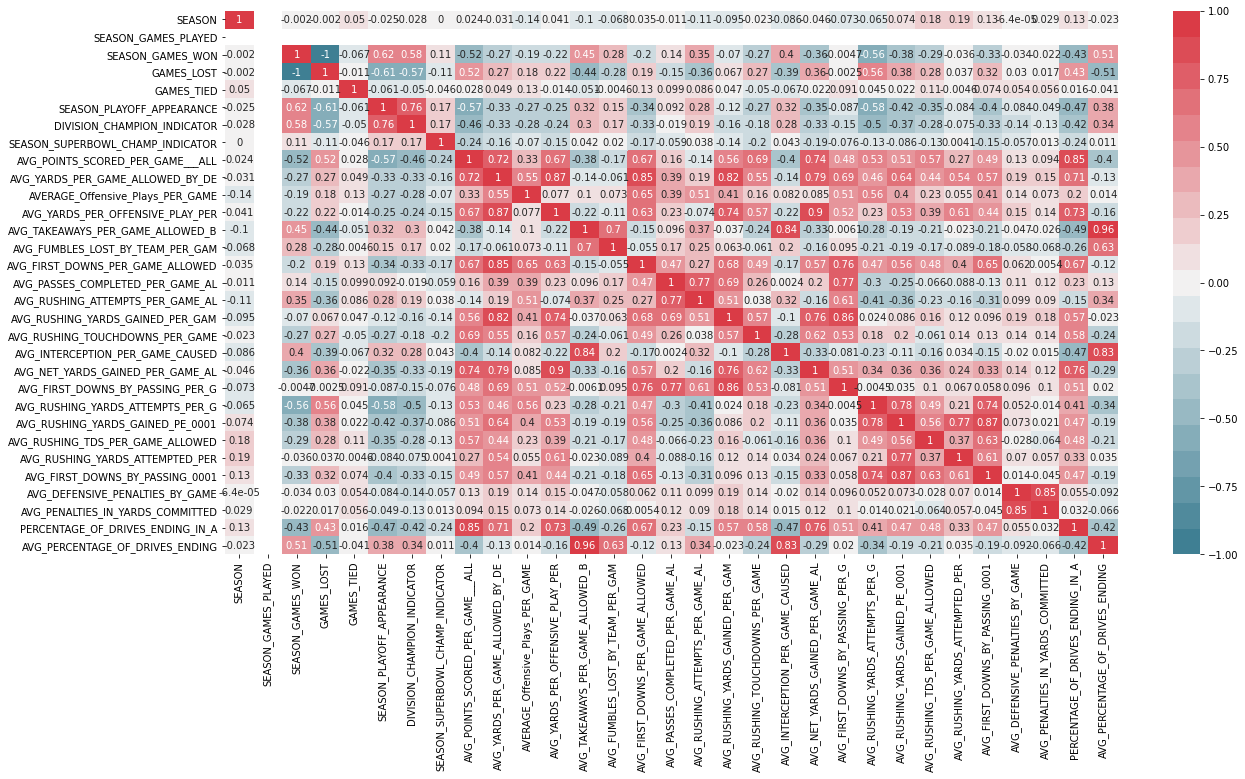

In [ ]:
plt.figure(figsize = (20,10))
ax2 = sns.heatmap(data.corr(),annot=True, vmin=-1,vmax=1,cmap=sns.diverging_palette(h_neg=220,h_pos=10,n=21))

In [ ]:
#indexing the columns that I do not want include in the analysis for predicting playoff appearances
#this will assist with multicollinearity of the data 
data1 = data.set_index(['TEAM','SEASON','SEASON_GAMES_PLAYED'])

In [ ]:
prediction_data.head()

,TEAM,SEASON,SEASON_GAMES_PLAYED,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,ACTUAL_SEASON_PLAYOFF_APPEARANCE,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
0,ARIZONA CARDINALS,2020,16,8,8,0,0,0,0,0,22.9,351.9,65.9,5.3,1.31,0.63,22.7,22.8,35.6,226.4,1.63,0.69,5.9,12.9,27.3,125.5,0.81,4.6,7.38,6.50,52.6,37.2,10.5
1,ATLANTA FALCONS,2020,16,4,12,0,0,0,0,0,25.9,398.4,64.6,6.2,1.31,0.56,22.9,26.6,39.1,293.6,2.13,0.75,7.2,14.9,23.8,104.8,0.94,4.4,6.06,5.69,50.0,42.0,12.1
2,BALTIMORE RAVENS,2020,16,11,5,0,1,1,0,0,18.9,329.8,63.6,5.2,1.38,0.75,21.7,23.8,37.3,221.0,1.38,0.63,5.6,13.3,23.9,108.8,0.75,4.6,6.00,4.81,40.4,30.0,12.4
3,BUFFALO BILLS,2020,16,13,3,0,1,1,1,0,23.4,352.5,64.1,5.5,1.63,0.69,21.9,23.1,35.8,232.9,1.44,0.94,6.1,12.4,25.9,119.6,1.31,4.6,7.81,5.38,45.5,39.4,15.3
4,CAROLINA PANTHERS,2020,16,5,11,0,0,0,0,0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2,25.5,121.0,1.06,4.7,7.13,5.31,44.6,46.0,12.4


In [ ]:
#indexing the prediction data as well 
#the "actual season playoff appeareance" feature was added in order to compare what actually happened in 2020 vs what I predicted would happen
prediction_data1 = prediction_data.set_index(['TEAM','SEASON','SEASON_GAMES_PLAYED','ACTUAL_SEASON_PLAYOFF_APPEARANCE'])

In [ ]:
prediction_data1.head()

,,,,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
TEAM,SEASON,SEASON_GAMES_PLAYED,ACTUAL_SEASON_PLAYOFF_APPEARANCE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARIZONA CARDINALS,2020,16,0,8,8,0,0,0,0,22.9,351.9,65.9,5.3,1.31,0.63,22.7,22.8,35.6,226.4,1.63,0.69,5.9,12.9,27.3,125.5,0.81,4.6,7.38,6.50,52.6,37.2,10.5
ATLANTA FALCONS,2020,16,0,4,12,0,0,0,0,25.9,398.4,64.6,6.2,1.31,0.56,22.9,26.6,39.1,293.6,2.13,0.75,7.2,14.9,23.8,104.8,0.94,4.4,6.06,5.69,50.0,42.0,12.1
BALTIMORE RAVENS,2020,16,1,11,5,0,1,0,0,18.9,329.8,63.6,5.2,1.38,0.75,21.7,23.8,37.3,221.0,1.38,0.63,5.6,13.3,23.9,108.8,0.75,4.6,6.00,4.81,40.4,30.0,12.4
BUFFALO BILLS,2020,16,1,13,3,0,1,1,0,23.4,352.5,64.1,5.5,1.63,0.69,21.9,23.1,35.8,232.9,1.44,0.94,6.1,12.4,25.9,119.6,1.31,4.6,7.81,5.38,45.5,39.4,15.3
CAROLINA PANTHERS,2020,16,0,5,11,0,0,0,0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2,25.5,121.0,1.06,4.7,7.13,5.31,44.6,46.0,12.4


In [ ]:
data1.head()

,,,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
TEAM,SEASON,SEASON_GAMES_PLAYED,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARIZONA CARDINALS,2014,16,11,5,0,1,0,0,18.7,368.2,63.1,5.8,1.56,0.44,18.8,22.8,36.2,259.5,1.38,1.13,6.8,12.2,24.8,108.7,0.56,4.4,4.81,8.13,74.5,29.8,12.8
ATLANTA FALCONS,2014,16,6,10,0,0,0,0,26.1,398.3,64.9,6.1,1.75,0.75,22.4,22.4,35.4,279.9,1.25,1.00,7.6,14.0,28.1,118.4,1.31,4.2,6.75,5.69,46.5,42.6,14.2
BALTIMORE RAVENS,2014,16,10,6,0,1,0,0,18.9,336.9,64.6,5.2,1.38,0.69,19.4,23.9,37.2,248.7,1.38,0.69,6.2,12.8,24.4,88.3,0.50,3.6,4.69,6.88,62.9,33.3,11.7
BUFFALO BILLS,2014,16,9,7,0,0,0,0,18.1,312.2,64.2,4.9,1.88,0.69,18.9,21.1,34.9,205.8,1.00,1.19,5.4,10.7,25.9,106.4,0.63,4.1,5.56,6.50,53.1,28.3,14.1
CAROLINA PANTHERS,2014,16,7,8,1,1,1,0,23.4,339.8,62.4,5.4,1.63,0.75,19.3,22.8,35.1,227.8,1.56,0.88,6.1,12.1,24.8,112.0,0.88,4.5,5.69,6.06,47.5,34.1,14.0


In [ ]:
#correlation map after indexing
corr1 = data1.corr()
corr1.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
SEASON_GAMES_WON,1.00,-1.00,-0.07,0.62,0.58,0.11,-0.52,-0.27,-0.19,-0.22,0.45,0.28,-0.20,0.14,0.35,-0.07,-0.27,0.40,-0.36,-0.00,-0.56,-0.38,-0.29,-0.04,-0.33,-0.03,-0.02,-0.43,0.51
GAMES_LOST,-1.00,1.00,-0.01,-0.61,-0.57,-0.11,0.52,0.27,0.18,0.22,-0.44,-0.28,0.19,-0.15,-0.36,0.07,0.27,-0.39,0.36,-0.00,0.56,0.38,0.28,0.04,0.32,0.03,0.02,0.43,-0.51
GAMES_TIED,-0.07,-0.01,1.00,-0.06,-0.05,-0.05,0.03,0.05,0.13,-0.01,-0.05,-0.00,0.13,0.10,0.09,0.05,-0.05,-0.07,-0.02,0.09,0.04,0.02,0.11,-0.00,0.07,0.05,0.06,0.02,-0.04
SEASON_PLAYOFF_APPEARANCE,0.62,-0.61,-0.06,1.00,0.76,0.17,-0.57,-0.33,-0.27,-0.25,0.32,0.15,-0.34,0.09,0.28,-0.12,-0.27,0.32,-0.35,-0.09,-0.58,-0.42,-0.35,-0.08,-0.40,-0.08,-0.05,-0.47,0.38
DIVISION_CHAMPION_INDICATOR,0.58,-0.57,-0.05,0.76,1.00,0.17,-0.46,-0.33,-0.28,-0.24,0.30,0.17,-0.33,-0.02,0.19,-0.16,-0.18,0.28,-0.33,-0.15,-0.50,-0.37,-0.28,-0.07,-0.33,-0.14,-0.13,-0.42,0.34
SEASON_SUPERBOWL_CHAMP_INDICATOR,0.11,-0.11,-0.05,0.17,0.17,1.00,-0.24,-0.16,-0.07,-0.15,0.04,0.02,-0.17,-0.06,0.04,-0.14,-0.20,0.04,-0.19,-0.08,-0.13,-0.09,-0.13,0.00,-0.15,-0.06,0.01,-0.24,0.01
AVG_POINTS_SCORED_PER_GAME___ALL,-0.52,0.52,0.03,-0.57,-0.46,-0.24,1.00,0.72,0.33,0.67,-0.38,-0.17,0.67,0.16,-0.14,0.56,0.69,-0.40,0.74,0.48,0.53,0.51,0.57,0.27,0.49,0.13,0.09,0.85,-0.40
AVG_YARDS_PER_GAME_ALLOWED_BY_DE,-0.27,0.27,0.05,-0.33,-0.33,-0.16,0.72,1.00,0.55,0.87,-0.14,-0.06,0.85,0.39,0.19,0.82,0.55,-0.14,0.79,0.69,0.46,0.64,0.44,0.54,0.57,0.19,0.15,0.71,-0.13
AVERAGE_Offensive_Plays_PER_GAME,-0.19,0.18,0.13,-0.27,-0.28,-0.07,0.33,0.55,1.00,0.08,0.10,0.07,0.65,0.39,0.51,0.41,0.16,0.08,0.08,0.51,0.56,0.40,0.23,0.06,0.41,0.14,0.07,0.20,0.01
AVG_YARDS_PER_OFFENSIVE_PLAY_PER,-0.22,0.22,-0.01,-0.25,-0.24,-0.15,0.67,0.87,0.08,1.00,-0.22,-0.11,0.63,0.23,-0.07,0.74,0.57,-0.22,0.90,0.52,0.23,0.53,0.39,0.61,0.44,0.15,0.14,0.73,-0.16


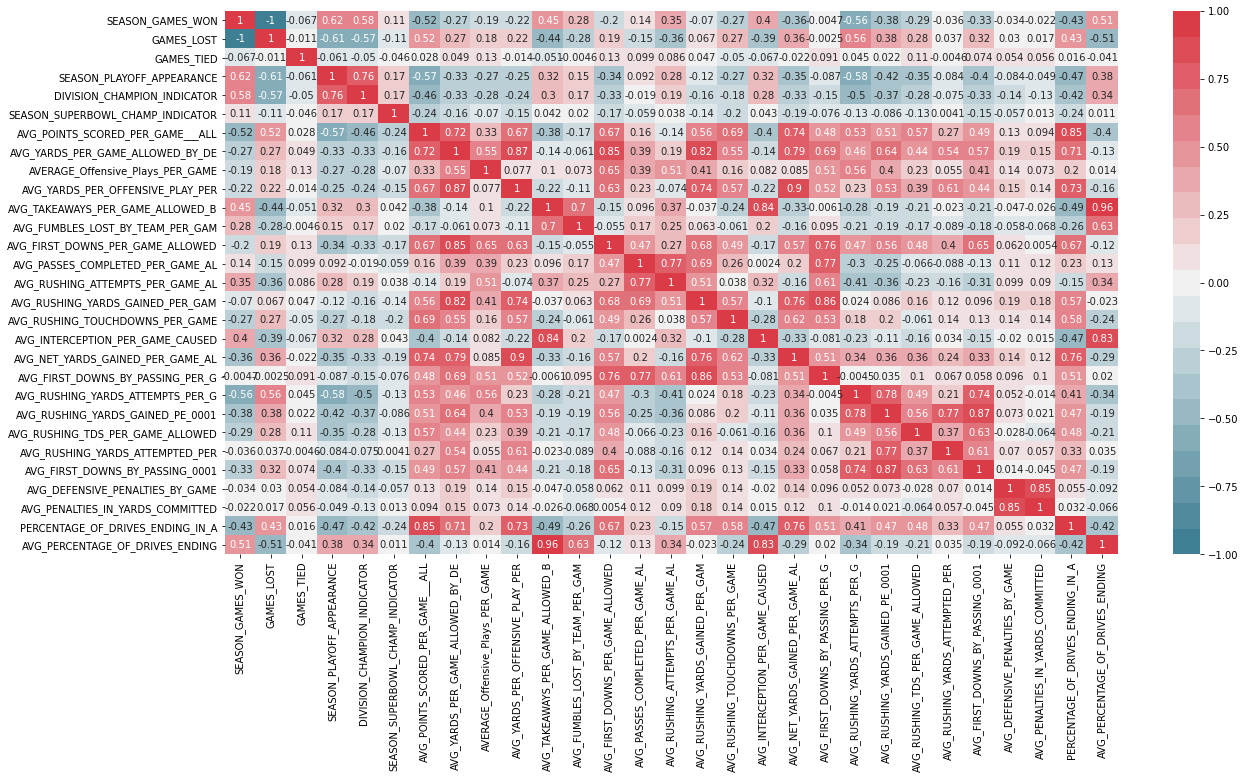

In [ ]:
plt.figure(figsize = (20,10))
ax3 = sns.heatmap(data1.corr(),annot=True, vmin=-1,vmax=1,cmap=sns.diverging_palette(h_neg=220,h_pos=10,n=21))

In [ ]:
data1.describe()

,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
count,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.968750,7.96875,0.062500,0.364583,0.250000,0.031250,22.684896,347.563021,63.700521,5.454688,1.406354,0.573490,20.055729,22.108333,34.997917,236.546875,1.57026,0.834583,6.341667,12.160104,26.347396,111.026562,0.800156,4.207292,5.930990,6.737344,57.491146,35.083333,11.660938
std,3.081623,3.07482,0.242694,0.482571,0.434145,0.174448,3.406266,29.714675,2.648807,0.395364,0.359367,0.198256,1.654272,1.765087,2.368488,22.990437,0.35226,0.262780,0.586348,1.222831,2.583636,16.945424,0.268028,0.412436,1.000756,0.711543,7.081410,4.745285,2.917394
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,14.100000,267.100000,57.600000,4.400000,0.440000,0.190000,16.100000,18.100000,29.000000,169.200000,0.81000,0.130000,4.800000,8.940000,20.800000,69.300000,0.250000,3.200000,3.690000,4.380000,38.300000,19.100000,3.900000
25%,6.000000,6.00000,0.000000,0.000000,0.000000,0.000000,19.800000,328.075000,62.100000,5.200000,1.130000,0.440000,19.000000,20.800000,33.575000,224.575000,1.31000,0.675000,5.900000,11.400000,24.600000,99.775000,0.630000,3.975000,5.380000,6.295000,52.300000,31.975000,9.475000
50%,8.000000,8.00000,0.000000,0.000000,0.000000,0.000000,22.550000,347.750000,63.400000,5.400000,1.380000,0.560000,20.000000,21.900000,34.600000,237.450000,1.56000,0.810000,6.400000,12.100000,26.300000,112.200000,0.750000,4.200000,5.940000,6.720000,57.500000,35.150000,11.800000
75%,10.000000,10.00000,0.000000,1.000000,0.250000,0.000000,25.000000,367.975000,65.300000,5.700000,1.645000,0.690000,21.100000,23.200000,36.600000,251.225000,1.81000,1.000000,6.800000,12.800000,27.900000,120.950000,0.940000,4.500000,6.500000,7.190000,61.825000,38.650000,13.900000
max,15.000000,16.00000,1.000000,1.000000,1.000000,1.000000,30.900000,420.300000,71.800000,6.600000,2.440000,1.130000,26.200000,26.600000,41.500000,298.900000,2.81000,1.690000,7.900000,15.400000,34.300000,165.900000,1.940000,5.200000,8.750000,9.000000,75.100000,46.300000,19.800000


In [ ]:
data1.head()

,,,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING
TEAM,SEASON,SEASON_GAMES_PLAYED,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARIZONA CARDINALS,2014,16,11,5,0,1,0,0,18.7,368.2,63.1,5.8,1.56,0.44,18.8,22.8,36.2,259.5,1.38,1.13,6.8,12.2,24.8,108.7,0.56,4.4,4.81,8.13,74.5,29.8,12.8
ATLANTA FALCONS,2014,16,6,10,0,0,0,0,26.1,398.3,64.9,6.1,1.75,0.75,22.4,22.4,35.4,279.9,1.25,1.00,7.6,14.0,28.1,118.4,1.31,4.2,6.75,5.69,46.5,42.6,14.2
BALTIMORE RAVENS,2014,16,10,6,0,1,0,0,18.9,336.9,64.6,5.2,1.38,0.69,19.4,23.9,37.2,248.7,1.38,0.69,6.2,12.8,24.4,88.3,0.50,3.6,4.69,6.88,62.9,33.3,11.7
BUFFALO BILLS,2014,16,9,7,0,0,0,0,18.1,312.2,64.2,4.9,1.88,0.69,18.9,21.1,34.9,205.8,1.00,1.19,5.4,10.7,25.9,106.4,0.63,4.1,5.56,6.50,53.1,28.3,14.1
CAROLINA PANTHERS,2014,16,7,8,1,1,1,0,23.4,339.8,62.4,5.4,1.63,0.75,19.3,22.8,35.1,227.8,1.56,0.88,6.1,12.1,24.8,112.0,0.88,4.5,5.69,6.06,47.5,34.1,14.0


In [ ]:
#install pycaret
!pip install pycaret

In [ ]:
#from pycaret, importing the classifcation model
from pycaret.classification import *

In [ ]:
#setting up the classification model
clf1 = setup(data1, #my dataset
             target = 'SEASON_PLAYOFF_APPEARANCE', #this is my target column I want to predit. Pycaret will use it as my Label, 
             ignore_features = ['SEASON_GAMES_WON','GAMES_LOST','GAMES_TIED','DIVISION_CHAMPION_INDICATOR','SEASON_SUPERBOWL_CHAMP_INDICATOR'],#I am ignoring these columns because I do not want them included to predict
             normalize =True, #normalizing my data so that data is normally distributed and on a common scale using SMOTE
             fix_imbalance =True, #since there are more teams that make it to the playoffs than teams that don't, this function will help with the imbalance of data
             ) 

,Description,Value
0,session_id,4929
1,Target,SEASON_PLAYOFF_APPEARANCE
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(192, 29)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. 
#The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.
#this is how I chose my best model - looks like ridge classifier is best model with the highest accuracy and f1 score
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8209,0.0000,0.815,0.7373,0.7620,0.6203,0.6352,0.023
svm,SVM - Linear Kernel,0.8203,0.0000,0.775,0.7638,0.7566,0.6164,0.6278,0.025
gbc,Gradient Boosting Classifier,0.8137,0.8464,0.810,0.7280,0.7545,0.6053,0.6218,0.139
lr,Logistic Regression,0.8066,0.8914,0.820,0.7086,0.7522,0.5957,0.6086,0.351
lda,Linear Discriminant Analysis,0.8060,0.8744,0.820,0.7039,0.7479,0.5925,0.6090,0.025
lightgbm,Light Gradient Boosting Machine,0.7989,0.8586,0.680,0.7317,0.6974,0.5464,0.5533,0.096
et,Extra Trees Classifier,0.7929,0.8700,0.770,0.6900,0.7150,0.5531,0.5687,0.480
rf,Random Forest Classifier,0.7769,0.8496,0.725,0.6592,0.6781,0.5080,0.5223,0.526
ada,Ada Boost Classifier,0.7758,0.8231,0.720,0.6783,0.6805,0.5077,0.5250,0.127
nb,Naive Bayes,0.7527,0.8442,0.750,0.6635,0.6813,0.4837,0.5061,0.026


In [ ]:
#this function creates the model
#it creates a model and scores it using stratified cross validation as well and outputs AUC, Recall, etc.
#I stored the trained model into the variable "ridge"
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.0,0.4000,0.6667,0.5000,0.3171,0.3373
1,0.7857,0.0,1.0000,0.6250,0.7692,0.5882,0.6455
2,0.9286,0.0,0.8000,1.0000,0.8889,0.8372,0.8485
3,0.8571,0.0,1.0000,0.7143,0.8333,0.7143,0.7454
4,0.9231,0.0,1.0000,0.8000,0.8889,0.8312,0.8433
5,0.7692,0.0,0.7500,0.6000,0.6667,0.4935,0.5007
6,0.8462,0.0,0.8000,0.8000,0.8000,0.6750,0.6750
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6154,0.0,0.6000,0.5000,0.5455,0.2169,0.2196
9,0.7692,0.0,0.8000,0.6667,0.7273,0.5301,0.5367


In [ ]:
#the create_model function uses default hyperparameters so to tune hyperparameters, I used the tune_model function
#hyperparameter tuning us done in this function. As you can see, accuracy did not change
#In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. 
#A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6429,0.0,0.400,0.5000,0.4444,0.1860,0.1886
1,0.7857,0.0,1.000,0.6250,0.7692,0.5882,0.6455
2,0.9286,0.0,0.800,1.0000,0.8889,0.8372,0.8485
3,0.8571,0.0,1.000,0.7143,0.8333,0.7143,0.7454
4,0.9231,0.0,1.000,0.8000,0.8889,0.8312,0.8433
5,0.9231,0.0,1.000,0.8000,0.8889,0.8312,0.8433
6,0.8462,0.0,0.800,0.8000,0.8000,0.6750,0.6750
7,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
8,0.6154,0.0,0.600,0.5000,0.5455,0.2169,0.2196
9,0.7692,0.0,0.800,0.6667,0.7273,0.5301,0.5367


In [ ]:
#I've taken the trained model and ploted based on the test\holdout set
#plot_model(ridge, plot='auc')

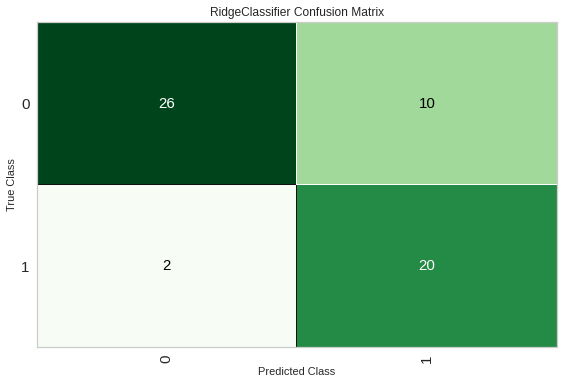

In [ ]:
plot_model(tuned_ridge, plot = 'confusion_matrix')
#confusion matrix to analyze model 

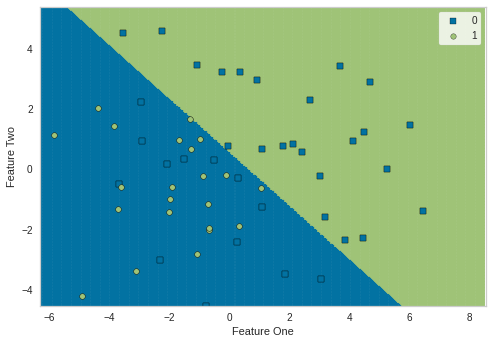

In [ ]:
plot_model(tuned_ridge, plot = 'boundary')
#features 0 vs 1 of playoff appearances using single line decision boundary

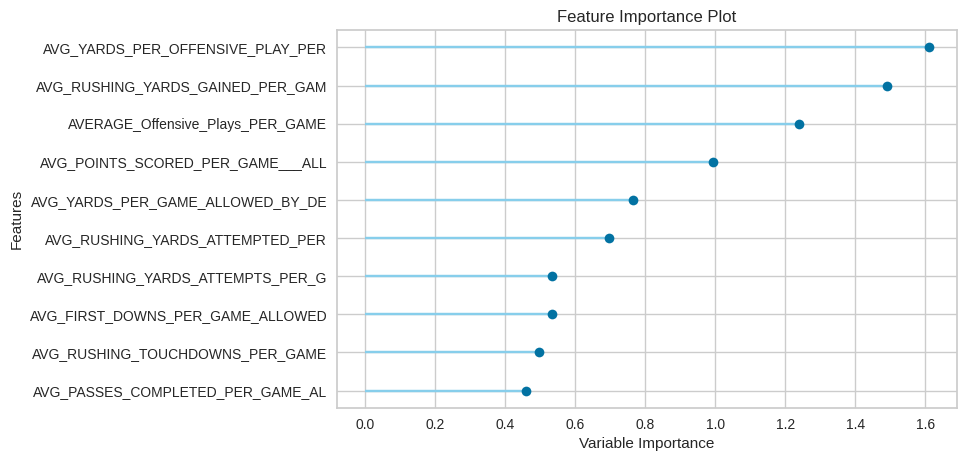

In [ ]:
#top important features
plot_model(tuned_ridge, plot = 'feature')

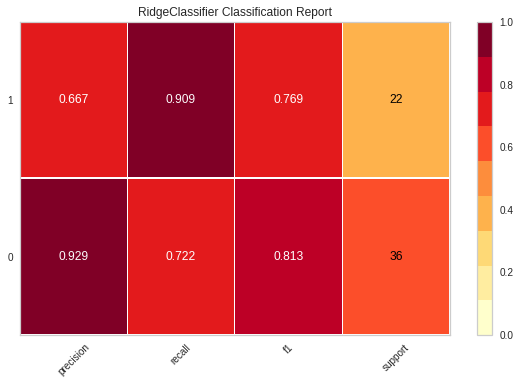

In [ ]:
#the model correctly classifed 67% as 1 for playoff appearance with recall score of 91%.
#The model correctly classifed 93% as not entered the playoffs with 72% recall score. the F1 score is good for both.
#overall the model did better classifying non playoff appearances but I'm sure that is due to the imbalance as this is an imbalanced classification problem
plot_model(tuned_ridge, plot = 'class_report')

In [ ]:
#this creates an interface for all visualizations pertaining to my model
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#SGDClassifier is the best model if I want to optimize precision
best = automl(optimize = 'Precision')
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4929, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#ridge classifier is the best model if I want to optimize recall
best2 = automl(optimize = 'Recall')
best2

RidgeClassifier(alpha=0.05, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4929,
                solver='auto', tol=0.001)

In [ ]:
ridge_pred_new = predict_model(tuned_ridge, data = prediction_data1) #new_data is pd dataframe - this is where we begin the prediction process with new data

In [ ]:
#making prediction and see accuracy is at 79% with new data
#the accuracy on test/holdout set is 79% compared to 64% achieved on the tuned_ridge results
predict_model(tuned_ridge).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7931,0.8157,0.9091,0.6667,0.7692,0.5896,0.613


,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING,SEASON_PLAYOFF_APPEARANCE,Label
0,0.358213,-1.903061,-1.520783,-1.423473,-0.990526,-0.621744,-2.046566,-2.069691,-1.793648,-1.506355,0.613688,-0.825453,-0.422421,-1.351641,0.165965,-1.331275,-0.863697,-2.247056,-1.737269,-1.764322,-0.940530,-0.566407,-1.047513,0,0
1,-0.695459,0.387549,-0.361640,0.592330,0.987958,0.348207,0.029661,0.594301,1.293321,0.451211,0.613688,1.089553,-0.252947,0.691005,-1.366424,0.067469,-1.315789,1.641312,-0.116893,-1.569009,-0.776776,-0.545619,1.171442,1,1
2,-0.666190,-0.361623,-0.361640,-0.163596,0.443158,-1.285394,-0.444906,-0.822716,-0.097989,-0.472008,-0.540382,1.549154,-0.591895,-1.037387,-0.384124,0.007437,-0.373931,0.426197,-0.179215,0.023545,-0.672569,-0.400100,0.670387,1,1
3,0.270408,0.334510,0.311412,0.088379,-0.789810,-0.928044,0.148302,1.274469,2.119413,1.425721,-0.057283,-0.365852,0.086002,1.633765,-1.602176,-1.397310,-0.599977,-0.545895,-1.602238,2.742907,2.498303,-0.046696,-0.975934,0,1
4,0.124064,0.679262,-0.099898,0.844306,1.160000,0.960807,0.207623,-0.199228,-0.228424,0.639275,-0.218316,0.821452,0.763899,0.455315,0.126673,0.337612,0.567926,0.426197,0.475168,1.240497,1.292479,0.140400,1.064073,0,1


In [ ]:
ridge_pred_new.head()

,,,,SEASON_GAMES_WON,GAMES_LOST,GAMES_TIED,SEASON_PLAYOFF_APPEARANCE,DIVISION_CHAMPION_INDICATOR,SEASON_SUPERBOWL_CHAMP_INDICATOR,AVG_POINTS_SCORED_PER_GAME___ALL,AVG_YARDS_PER_GAME_ALLOWED_BY_DE,AVERAGE_Offensive_Plays_PER_GAME,AVG_YARDS_PER_OFFENSIVE_PLAY_PER,AVG_TAKEAWAYS_PER_GAME_ALLOWED_B,AVG_FUMBLES_LOST_BY_TEAM_PER_GAM,AVG_FIRST_DOWNS_PER_GAME_ALLOWED,AVG_PASSES_COMPLETED_PER_GAME_AL,AVG_RUSHING_ATTEMPTS_PER_GAME_AL,AVG_RUSHING_YARDS_GAINED_PER_GAM,AVG_RUSHING_TOUCHDOWNS_PER_GAME,AVG_INTERCEPTION_PER_GAME_CAUSED,AVG_NET_YARDS_GAINED_PER_GAME_AL,AVG_FIRST_DOWNS_BY_PASSING_PER_G,AVG_RUSHING_YARDS_ATTEMPTS_PER_G,AVG_RUSHING_YARDS_GAINED_PE_0001,AVG_RUSHING_TDS_PER_GAME_ALLOWED,AVG_RUSHING_YARDS_ATTEMPTED_PER,AVG_FIRST_DOWNS_BY_PASSING_0001,AVG_DEFENSIVE_PENALTIES_BY_GAME,AVG_PENALTIES_IN_YARDS_COMMITTED,PERCENTAGE_OF_DRIVES_ENDING_IN_A,AVG_PERCENTAGE_OF_DRIVES_ENDING,Label
TEAM,SEASON,SEASON_GAMES_PLAYED,ACTUAL_SEASON_PLAYOFF_APPEARANCE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARIZONA CARDINALS,2020,16,0,8,8,0,0,0,0,22.9,351.9,65.9,5.3,1.31,0.63,22.7,22.8,35.6,226.4,1.63,0.69,5.9,12.9,27.3,125.5,0.81,4.6,7.38,6.50,52.6,37.2,10.5,0
ATLANTA FALCONS,2020,16,0,4,12,0,0,0,0,25.9,398.4,64.6,6.2,1.31,0.56,22.9,26.6,39.1,293.6,2.13,0.75,7.2,14.9,23.8,104.8,0.94,4.4,6.06,5.69,50.0,42.0,12.1,1
BALTIMORE RAVENS,2020,16,1,11,5,0,1,0,0,18.9,329.8,63.6,5.2,1.38,0.75,21.7,23.8,37.3,221.0,1.38,0.63,5.6,13.3,23.9,108.8,0.75,4.6,6.00,4.81,40.4,30.0,12.4,1
BUFFALO BILLS,2020,16,1,13,3,0,1,1,0,23.4,352.5,64.1,5.5,1.63,0.69,21.9,23.1,35.8,232.9,1.44,0.94,6.1,12.4,25.9,119.6,1.31,4.6,7.81,5.38,45.5,39.4,15.3,1
CAROLINA PANTHERS,2020,16,0,5,11,0,0,0,0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2,25.5,121.0,1.06,4.7,7.13,5.31,44.6,46.0,12.4,1


In [ ]:
#indexing the label and score columns so that I can make an easier comparison
column_names = ["Label"]

In [ ]:
predict_new_final = ridge_pred_new.reindex(columns=column_names)

In [ ]:
predict_new_final.head()

,,,,Label
TEAM,SEASON,SEASON_GAMES_PLAYED,ACTUAL_SEASON_PLAYOFF_APPEARANCE,
ARIZONA CARDINALS,2020,16,0,0
ATLANTA FALCONS,2020,16,0,1
BALTIMORE RAVENS,2020,16,1,1
BUFFALO BILLS,2020,16,1,1
CAROLINA PANTHERS,2020,16,0,1


In [ ]:
#comparing the actual season playoff appearances to the predicted appearances
predict_new_final

,,,,Label
TEAM,SEASON,SEASON_GAMES_PLAYED,ACTUAL_SEASON_PLAYOFF_APPEARANCE,
ARIZONA CARDINALS,2020,16,0,0
ATLANTA FALCONS,2020,16,0,1
BALTIMORE RAVENS,2020,16,1,1
BUFFALO BILLS,2020,16,1,1
CAROLINA PANTHERS,2020,16,0,1
CHICAGO BEARS,2020,16,1,0
CINCINNATI BENGALS,2020,16,0,0
CLEVELAND BROWNS,2020,16,1,1
DALLAS COWBOYS,2020,16,0,0


In [ ]:
#this function fits the estimator onto the complete dataset passed during the setup stages
#the purpose is to prepare for final model deployment after the experiment before it is deployed in production
finalize_model(tuned_ridge)

RidgeClassifier(alpha=0.05, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4929,
                solver='auto', tol=0.001)

In [ ]:
#model deployment to the cloud
#deploy_model(model = lda, model_name = 'deploy_lda', platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
#saving my model
save_model(tuned_ridge, 'deep_learning_final2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['SEASON_GAMES_WON',
                                                        'GAMES_LOST',
                                                        'GAMES_TIED',
                                                        'DIVISION_CHAMPION_INDICATOR',
                                                        'SEASON_SUPERBOWL_CHAMP_INDICATOR'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='SEASON_PLAYOFF_APPEARANCE',
                                       time_features=[])),
                 ('...
                 ('fix_perfect', Remove_100(target='SEASON_PLAYOFF_APPEARANCE')),
       